## **Descripción**
# **Ejercicio de Regresión 1 (Core)**


**Objetivo**

 Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.

 **Descripción del problema:** Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

**SqFt:** Tamaño de la casa en pies cuadrados.

**Bedrooms:** Número de habitaciones.

**Bathrooms:** Número de baños.

**price:** Precio de venta de la casa.

### **1. Exploración de datos:**

 Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.

In [1]:
# Importamos librerias y cargamos el data set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

path = '../data/house-prices.csv'
df = pd.read_csv(path)
df.head()


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


### **Limpieza de datos**

In [2]:
# Informacion basica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [3]:
# Antes de convertir vemos los valores unicos para las columnas de Brick y Neighborhood
columns_to_check = ['Brick', 'Neighborhood']

for column in columns_to_check:
    print(f"Valores unicos '{column}': {df[column].unique()}")

Valores unicos 'Brick': ['No' 'Yes']
Valores unicos 'Neighborhood': ['East' 'North' 'West']


In [4]:
# Convertimos los tipos de datos de la columnas

# Brick a Buleano
df['Brick'] = df['Brick'].astype(bool)

# Neighborhood a categorias
df['Neighborhood'] = df['Neighborhood'].astype('category')

df.dtypes

Home               int64
Price              int64
SqFt               int64
Bedrooms           int64
Bathrooms          int64
Offers             int64
Brick               bool
Neighborhood    category
dtype: object

In [5]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [6]:
# Verificamos los valores faltantes
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

# Fuente: Clase de Manejo de valores nulo

,datos sin NAs en q,Na en q,Na en %
Home,128,0,0.0
Price,128,0,0.0
SqFt,128,0,0.0
Bedrooms,128,0,0.0
Bathrooms,128,0,0.0
Offers,128,0,0.0
Brick,128,0,0.0
Neighborhood,128,0,0.0


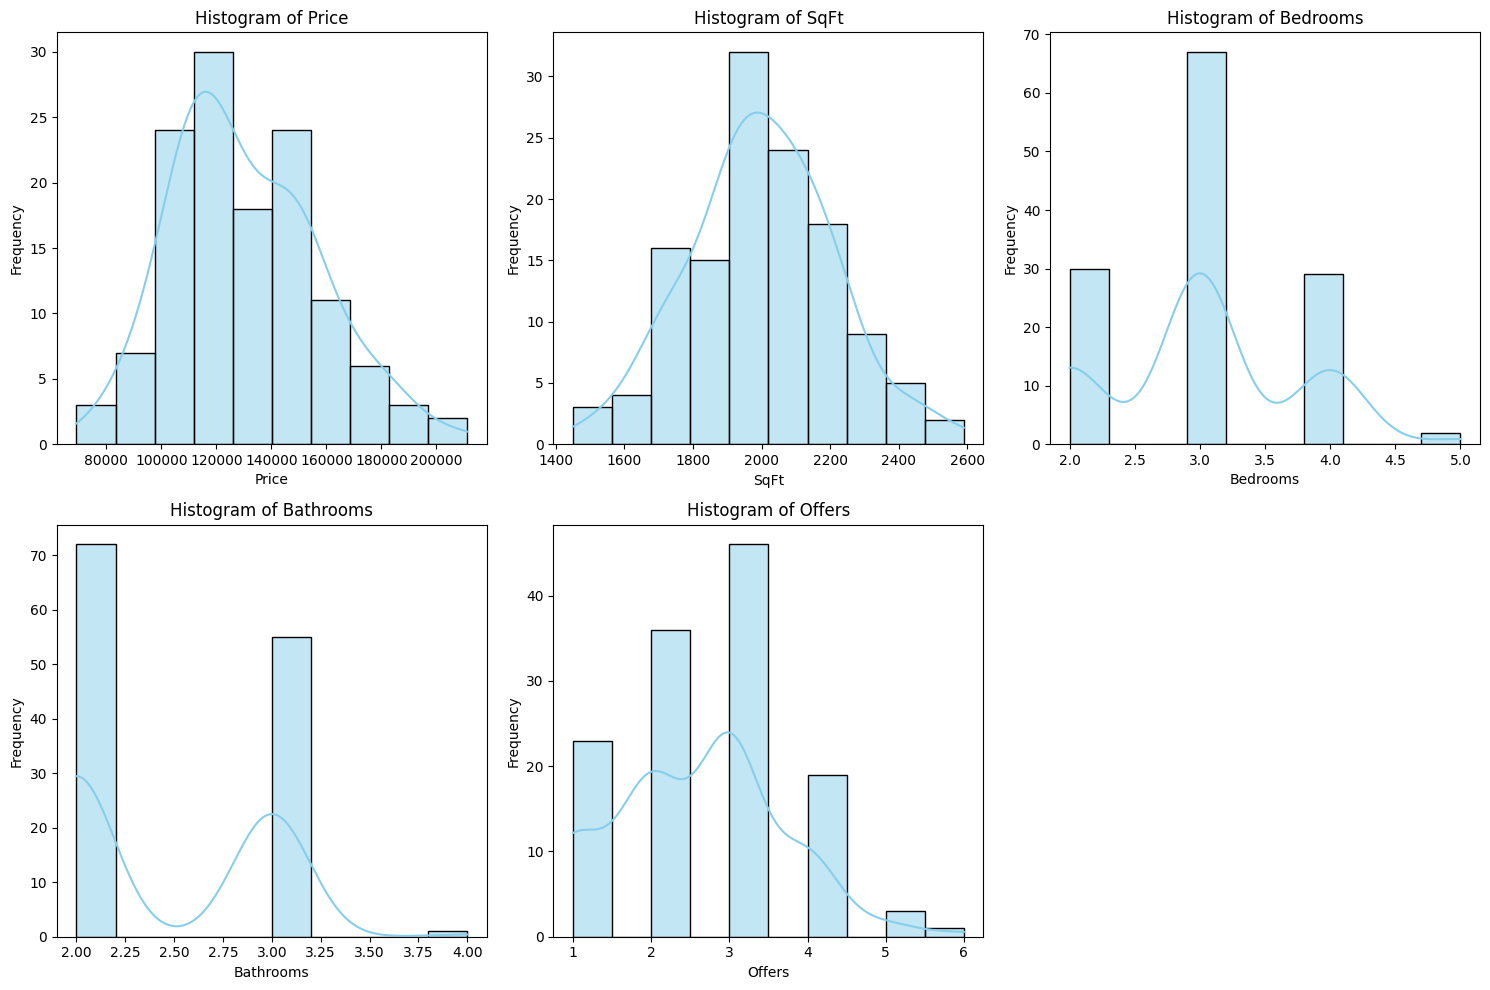

In [12]:
# Exploramos los valores y verificamos si hay valores atípicos
numeric_columns = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Create a grid of 2 rows x 3 columns
    sns.histplot(df[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## **Preparación de datos:**

 Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).

In [8]:
# Dividir los datos en variables predictoras (X) y objetivo (y)
X = df[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers']]  # Variables predictoras
y = df['Price']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Entrenamiento del modelo:**

 Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.

In [9]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

## **Evaluación del modelo:** 

Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.


In [10]:
# Evaluación del modelo en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print("Error Cuadrático Medio (MSE):", mse)
print("R-cuadrado (R²):", r2)

Error Cuadrático Medio (MSE): 253234019.1735968
R-cuadrado (R²): 0.5703520599694544


## **Predicción:** 

Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:

Tamaño: 2000 pies cuadrados

Habitaciones: 3

Baños: 2

In [ ]:
# Predicción para una casa específica
new_house = np.array([[2000, 3, 2, 3]])  # Tamaño, Habitaciones, Baños, Ofertas
predicted_price = model.predict(new_house)

print("Precio estimado de la casa:", predicted_price[0])


Precio estimado de la casa: 118274.61725615604


c:\Users\damav\Desktop\Codingdojo\clases\MITIC-DataScience_MachineLearning-DanielaRiveros-2024\examen\notebook\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
